heart_failure_clinical_records_dataset.csv

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#Load dataframe
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = pd.DataFrame(df)
print("Size of Flaredown data or df is",df.shape,df.dtypes)#Display the amount object and variables


Size of Flaredown data or df is (299, 13) age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [3]:
#Top  five rows on dataset
display(df.head())
dfb =df


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#Value_counts groups all the unique instances and gives the count of each of those instances.
display(df.dtypes.value_counts())
display(df.describe())

int64      10
float64     3
dtype: int64

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
  # number of unique counts in different parameters
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [6]:
#count of missing values of the entire dataframe'''
df.isnull().sum().sum
data = df
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
data$anaemia <- factor(data$anaemia, levels=c(0,1), labels=c("No","Yes"))
data$diabetes <- factor(data$diabetes, levels=c(0,1), labels=c("No","Yes"))
data$high_blood_pressure <- factor(data$high_blood_pressure, levels=c(0,1), labels=c("No","Yes"))
data$sex <- factor(data$sex, levels=c(0,1), labels=c("Female","Male"))
data$smoking <- factor(data$smoking, levels=c(0,1), labels=c("No","Yes"))
data$DEATH_EVENT <- factor(data$DEATH_EVENT, levels=c(0,1), labels=c("No","Yes"))


SyntaxError: invalid syntax (<ipython-input-7-1ee02d6908f0>, line 1)

In [8]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
deathORalive = df.DEATH_EVENT.value_counts()
display(deathORalive)


Anemia = df.anaemia.value_counts()
display(Anemia)

Smoking = df.smoking.value_counts()
display(Smoking)

0    203
1     96
Name: DEATH_EVENT, dtype: int64

0    170
1    129
Name: anaemia, dtype: int64

0    203
1     96
Name: smoking, dtype: int64

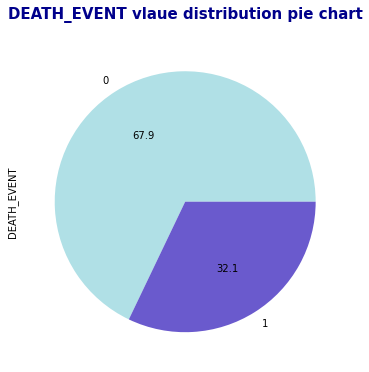

In [10]:
plt.figure(figsize = (10,6))
deathORalive.plot.pie(autopct = '%.1f', colors = ['powderblue', 'slateblue'])
plt.title("DEATH_EVENT vlaue distribution pie chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

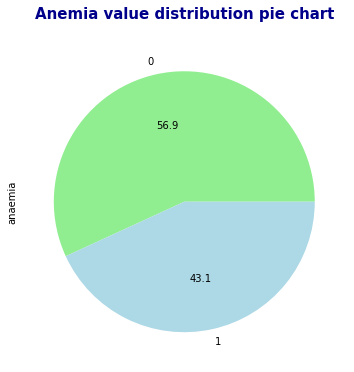

In [11]:
plt.figure(figsize = (10,6))
Anemia.plot.pie(autopct = '%.1f', colors = ['lightgreen', 'lightblue'])
plt.title("Anemia value distribution pie chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

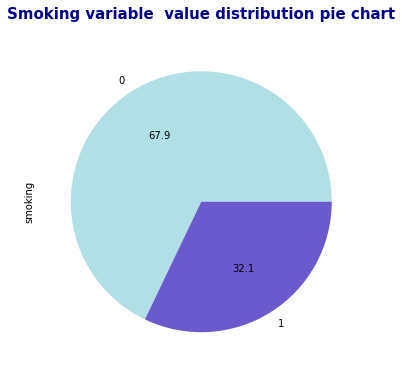

In [12]:
plt.figure(figsize = (10,6))
Smoking.plot.pie(autopct = '%.1f', colors = ['powderblue', 'slateblue'])
plt.title("Smoking variable  value distribution pie chart", pad = 20, fontdict = {'size' : 15, 'color' : 'darkblue', 'weight' : 'bold'})
plt.show()

In [13]:
library(tidyverse)
from scipy.stats import chi2_contingency 

xtabs(~DEATH_EVENT+sex, data = data)
chisq.test(df$sex, data$DEATH_EVENT)

SyntaxError: invalid syntax (<ipython-input-13-a349632167db>, line 5)

NameError: name 'sns' is not defined

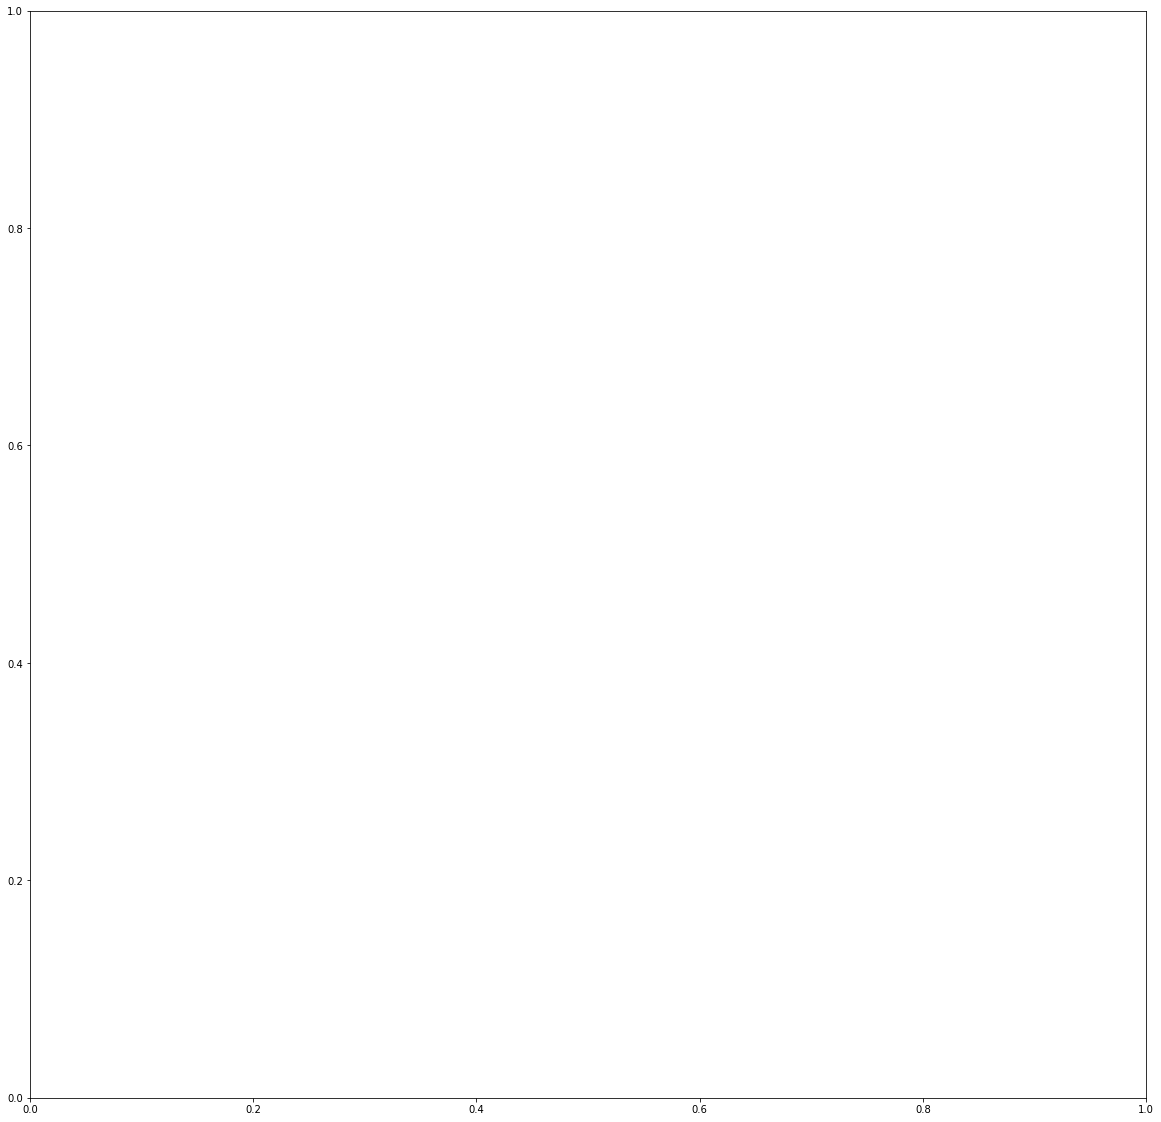

In [15]:
import numpy as np

# co-relation with each others
corrMat = df.corr()
fig, ax = plt.subplots(figsize = (20,20))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
mask = np.triu(np.ones_like(corrMat, dtype = bool))
sns.heatmap(corrMat, square = True, annot = False, linewidths = 1, cmap = cmap, mask = mask)

<AxesSubplot:>

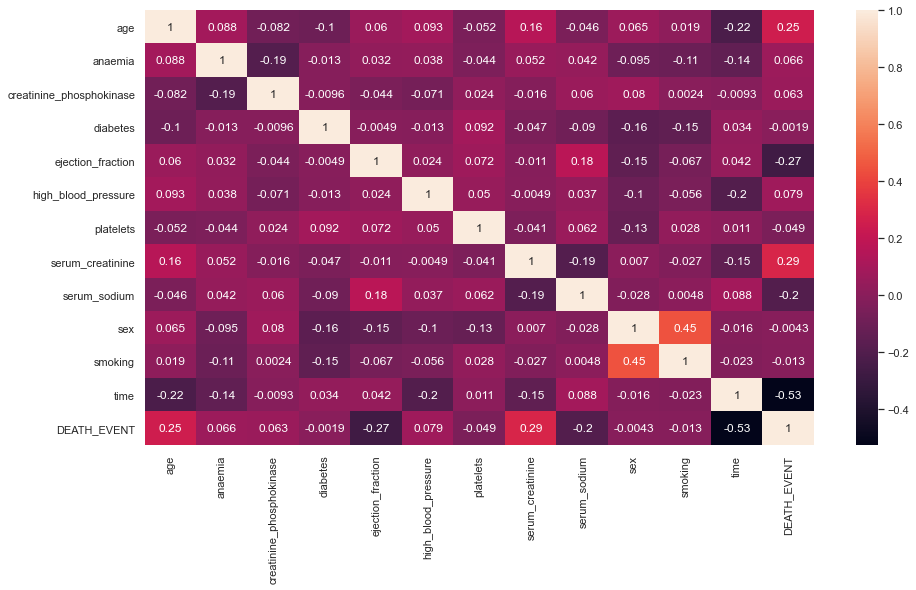

In [121]:
corr = df.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

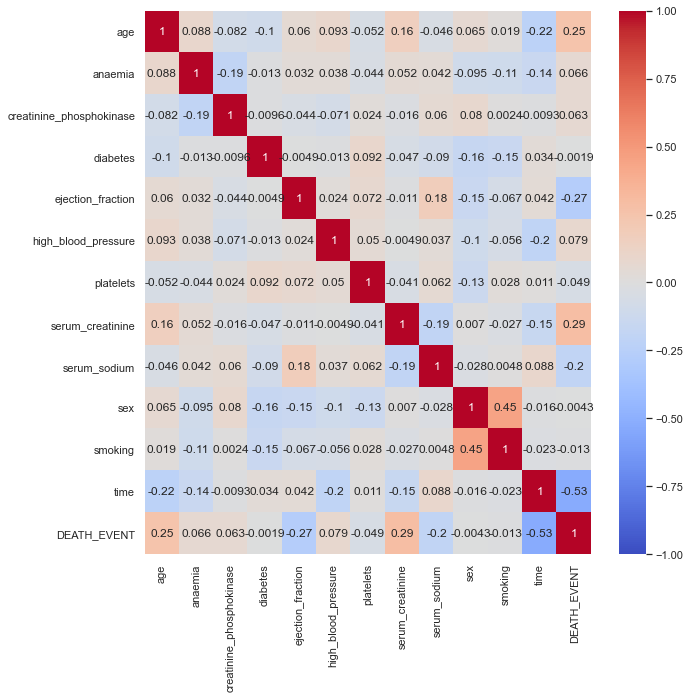

In [122]:
# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In [123]:
corr_matrix = df.corr()
print(corr_matrix["DEATH_EVENT"].sort_values(ascending=False))

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


Data Modeling

In [187]:
features=['time','ejection_fraction','serum_creatinine']


In [188]:
X=df[features]
y=df.DEATH_EVENT

Train Test Split


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [191]:
accuracy_list=[]

In [192]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

accuracy_list.append(100*log_reg_acc)

In [193]:
print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  82.22%


In [194]:
# svc
from sklearn.svm import SVC

sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)


In [195]:
print("Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  85.56%
